<a href="https://colab.research.google.com/github/Gothama/HeartDiseasesPrediction-ML/blob/main/part11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:

df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


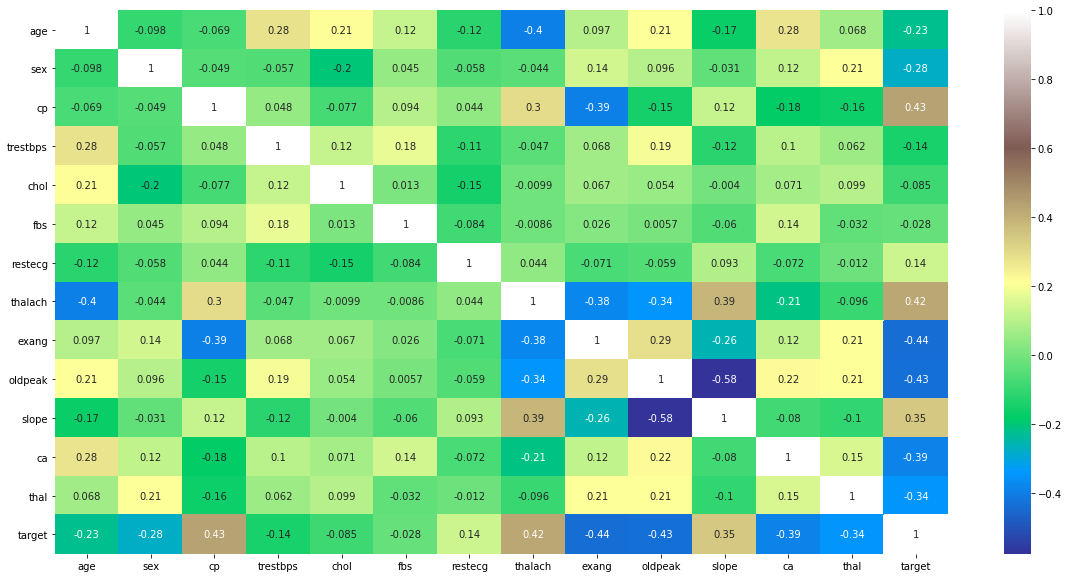

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

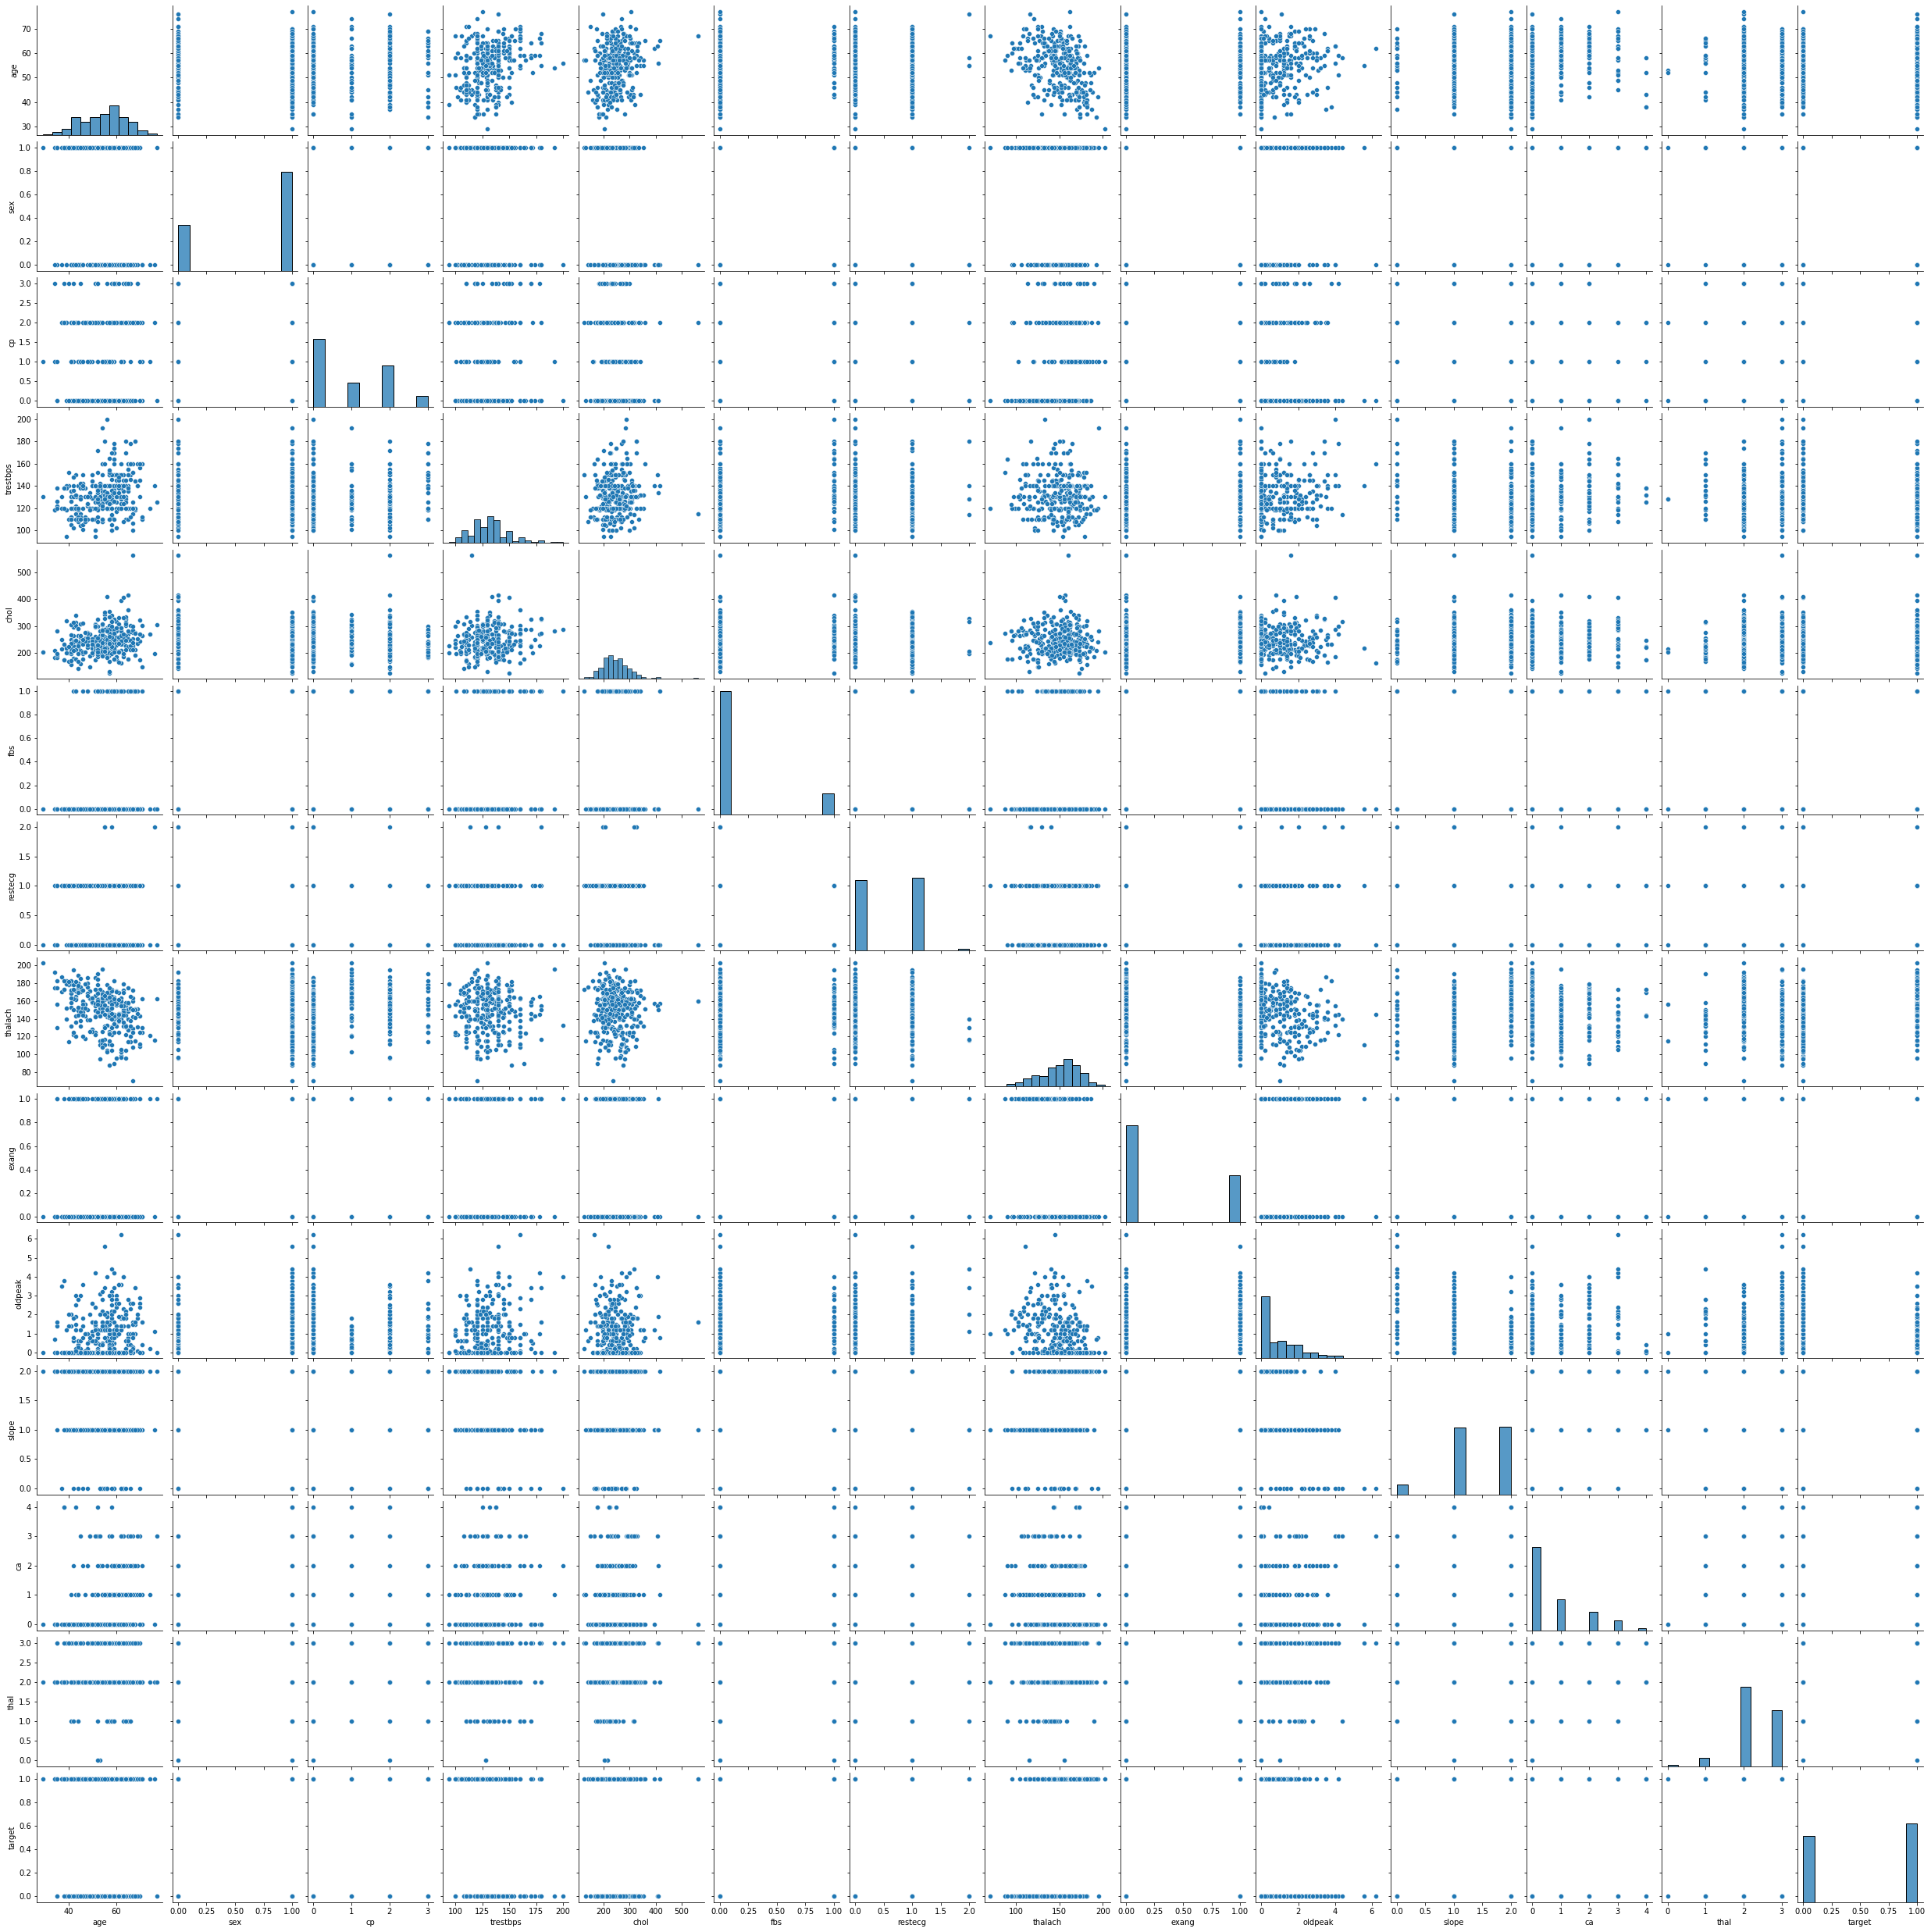

In [ ]:
sns.pairplot(data=df)

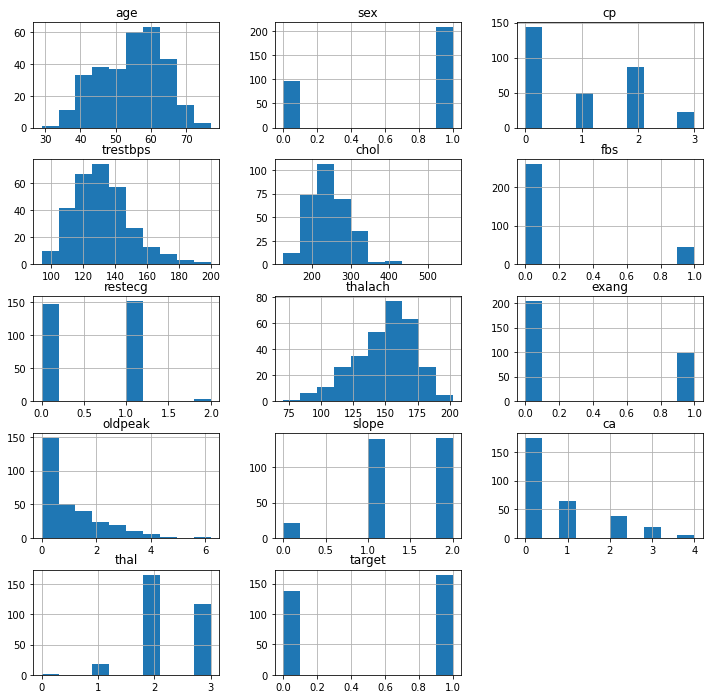

In [ ]:
df.hist(figsize=(12,12), layout=(5,3));

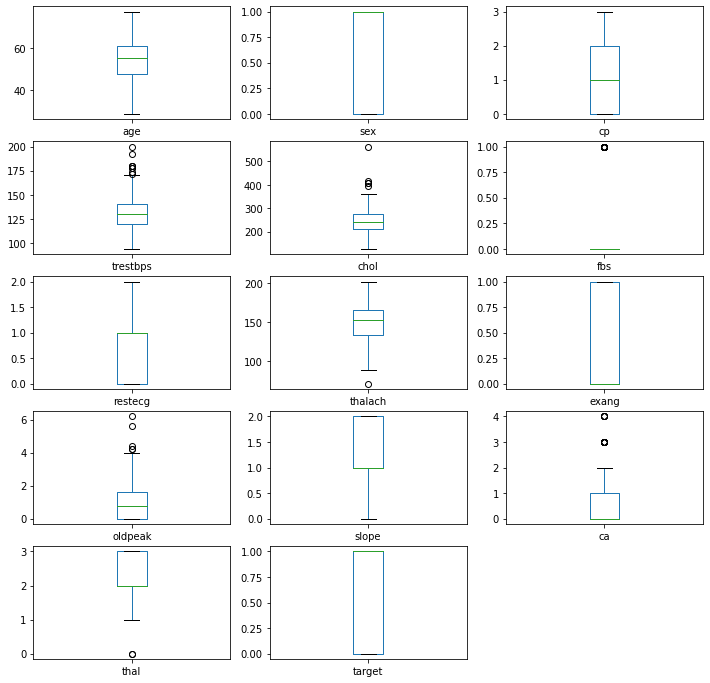

In [ ]:
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

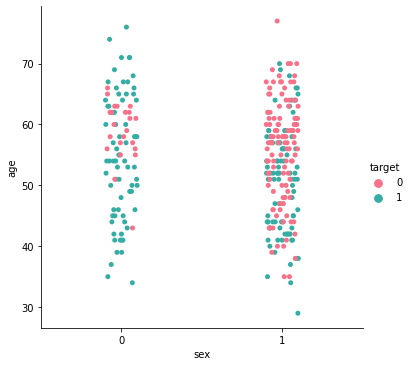

In [ ]:
sns.catplot(data=df, x='sex', y='age',  hue='target', palette='husl')

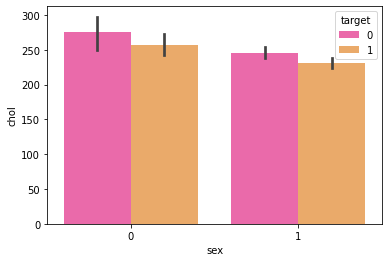

In [ ]:
sns.barplot(data=df, x='sex', y='chol', hue='target', palette='spring')

In [ ]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [ ]:
X= df.drop(['target'], axis=1)
y= df['target']

In [ ]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [ ]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2756
X_test- 1183
y_train- 212
y_test- 91


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [ ]:
model1.coef_

array([[ 0.00418746, -1.38025566,  0.83473431, -0.39805382, -0.13320178,
        -0.09980133,  0.66303189,  0.50137207, -0.50213258, -0.68944162,
         0.42491827, -0.57907206, -0.61299438]])

In [ ]:
model1.intercept_

array([1.29511384])

In [ ]:
import pickle

In [ ]:
with open('model_pickle' , 'wb') as f:
  pickle.dump(model1,f)

In [ ]:
model1.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1])

In [ ]:
print(X_train)

          age  sex  cp  trestbps      chol  ...  exang   oldpeak  slope  ca  thal
33  -0.040403    1   2 -0.378302  0.516686  ...      0 -0.465514      0   1     2
261 -0.260980    1   0 -1.120770 -0.314310  ...      0 -0.896862      2   1     2
139  1.062485    1   0 -0.206964  0.323431  ...      1 -0.724323      1   1     3
297  0.511041    1   0  1.849101 -1.357886  ...      0 -0.034166      1   2     1
192 -0.040403    1   0 -0.663867 -1.125980  ...      0  0.310912      1   1     3
..        ...  ...  ..       ...       ...  ...    ...       ...    ...  ..   ...
268 -0.040403    1   0 -0.549641  0.767917  ...      1  1.863764      1   2     2
193  0.621330    1   0  0.763956  0.690615  ...      1  1.518686      1   2     3
165  1.393352    1   0  1.620649  0.767917  ...      1  0.397182      1   3     2
7   -1.143291    1   1 -0.663867  0.323431  ...      0 -0.896862      2   0     3
219 -0.702136    1   0 -0.092738  0.188152  ...      1 -0.896862      2   2     3

[212 rows x 13 

In [ ]:
import numpy

In [ ]:
model1.predict(numpy.array([[-0.040403	,1,	0	,-0.663867,	-1.125980	,0,	1	,-1.602586	,	0,	0.310912,	1,	2	,3		]]))

array([0])

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
33,-0.040403,1,2,-0.378302,0.516686,0,0,0.102904,0,-0.465514,0,1,2
261,-0.260980,1,0,-1.120770,-0.314310,0,1,0.452748,0,-0.896862,2,1,2
139,1.062485,1,0,-0.206964,0.323431,0,1,-1.952430,1,-0.724323,1,1,3
297,0.511041,1,0,1.849101,-1.357886,1,0,-2.608388,0,-0.034166,1,2,1
192,-0.040403,1,0,-0.663867,-1.125980,0,1,-1.602586,0,0.310912,1,1,3


In [ ]:
model1.predict(X_train)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0])